<a href="https://colab.research.google.com/github/seonghaiiiii/busan-car-accident/blob/main/frequencyXeclo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데이콘/대구교통사고/data/countrywide_accident.csv')

In [ ]:
train = train[train['시군구'].str.startswith('부산광역시')]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           36244 non-null  object
 1   사고일시         36244 non-null  object
 2   요일           36244 non-null  object
 3   기상상태         36244 non-null  object
 4   시군구          36244 non-null  object
 5   도로형태         36244 non-null  object
 6   노면상태         36244 non-null  object
 7   사고유형         36244 non-null  object
 8   사고유형 - 세부분류  36244 non-null  object
 9   법규위반         36244 non-null  object
 10  가해운전자 차종     36244 non-null  object
 11  가해운전자 성별     36244 non-null  object
 12  가해운전자 연령     36244 non-null  object
 13  가해운전자 상해정도   36244 non-null  object
 14  피해운전자 차종     35033 non-null  object
 15  피해운전자 성별     35033 non-null  object
 16  피해운전자 연령     35033 non-null  object
 17  피해운전자 상해정도   35033 non-null  object
 18  사망자수         36244 non-null  int64 
 19  중상자수         36244 non-

In [ ]:
train["가해운전자 차종"]

11        승용
12        승용
30        승용
48        승용
54        승용
          ..
602754    승용
602755    이륜
602758    승용
602769    이륜
602770    이륜
Name: 가해운전자 차종, Length: 36244, dtype: object

In [ ]:
train_df = train[['사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','법규위반','사망자수','중상자수','경상자수','부상자수','ECLO']]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사고일시    36244 non-null  object
 1   요일      36244 non-null  object
 2   기상상태    36244 non-null  object
 3   시군구     36244 non-null  object
 4   도로형태    36244 non-null  object
 5   노면상태    36244 non-null  object
 6   사고유형    36244 non-null  object
 7   법규위반    36244 non-null  object
 8   사망자수    36244 non-null  int64 
 9   중상자수    36244 non-null  int64 
 10  경상자수    36244 non-null  int64 
 11  부상자수    36244 non-null  int64 
 12  ECLO    36244 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 3.9+ MB


In [ ]:
train["도로형태"]

11         교차로 - 교차로안
12        교차로 - 교차로부근
30           단일로 - 기타
48         교차로 - 교차로안
54         교차로 - 교차로안
             ...     
602754     교차로 - 교차로안
602755    교차로 - 교차로부근
602758        기타 - 기타
602769       단일로 - 기타
602770     교차로 - 교차로안
Name: 도로형태, Length: 36244, dtype: object

In [ ]:
# 시군구별 행의 개수를 구해서 '빈도' 열로 추가
train_df['빈도'] = train_df.groupby('시군구')['시군구'].transform('count')

<ipython-input-8-aad7ad792648>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['빈도'] = train_df.groupby('시군구')['시군구'].transform('count')


In [ ]:
train_df

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,빈도
11,2019-01-01 00,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,중앙선침범,1,0,0,0,10,953
12,2019-01-01 00,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,1,0,0,5,1132
30,2019-01-01 01,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5,21
48,2019-01-01 02,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,신호위반,0,1,2,0,11,544
54,2019-01-01 03,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,신호위반,0,0,1,0,3,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,2021-12-31 22,금요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대차,안전운전불이행,0,1,1,0,8,953
602755,2021-12-31 22,금요일,맑음,부산광역시 금정구 남산동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,0,1,1,4,197
602758,2021-12-31 22,금요일,흐림,부산광역시 해운대구 중동,기타 - 기타,건조,차대차,안전운전불이행,0,0,3,0,9,344
602769,2021-12-31 23,금요일,맑음,부산광역시 연제구 연산동,단일로 - 기타,건조,차대차,안전운전불이행,0,1,0,0,5,1570


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler(feature_range=(0, 10))

# '빈도' 열에 대해 스케일링 적용
train_df['빈도_scaled'] = scaler.fit_transform(train_df[['빈도']].values.reshape(-1, 1))


<ipython-input-13-1df765fb3b39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['빈도_scaled'] = scaler.fit_transform(train_df[['빈도']].values.reshape(-1, 1))


In [ ]:
train_df

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,빈도,빈도_scaled,위험지수
11,2019-01-01 00,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,중앙선침범,1,0,0,0,10,953,6.067559,60.675590
12,2019-01-01 00,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,1,0,0,5,1132,7.208413,36.042065
30,2019-01-01 01,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5,21,0.127470,0.637349
48,2019-01-01 02,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,신호위반,0,1,2,0,11,544,3.460803,38.068834
54,2019-01-01 03,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,신호위반,0,0,1,0,3,669,4.257489,12.772467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,2021-12-31 22,금요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대차,안전운전불이행,0,1,1,0,8,953,6.067559,48.540472
602755,2021-12-31 22,금요일,맑음,부산광역시 금정구 남산동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,0,1,1,4,197,1.249203,4.996813
602758,2021-12-31 22,금요일,흐림,부산광역시 해운대구 중동,기타 - 기타,건조,차대차,안전운전불이행,0,0,3,0,9,344,2.186106,19.674952
602769,2021-12-31 23,금요일,맑음,부산광역시 연제구 연산동,단일로 - 기타,건조,차대차,안전운전불이행,0,1,0,0,5,1570,10.000000,50.000000


In [ ]:
# 'ECLO'와 '빈도_scaled'를 곱하여 '사고위험' 열 생성
train_df['위험지수'] = train_df['ECLO'] * train_df['빈도_scaled']

<ipython-input-15-8cc51d25c328>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['위험지수'] = train_df['ECLO'] * train_df['빈도_scaled']


In [ ]:
# '사고일시' 열을 datetime 타입으로 변환
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])

# '년도', '월', '일', '시간' 열 추가
train_df['year'] = train_df['사고일시'].dt.year
train_df['month'] = train_df['사고일시'].dt.month
train_df['day'] = train_df['사고일시'].dt.day
train_df['hour'] = train_df['사고일시'].dt.hour

<ipython-input-16-43ce9faddc7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])
<ipython-input-16-43ce9faddc7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['year'] = train_df['사고일시'].dt.year
<ipython-input-16-43ce9faddc7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
train_df.head()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,빈도,빈도_scaled,위험지수,year,month,day,hour
11,2019-01-01 00:00:00,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,중앙선침범,1,0,0,0,10,953,6.067559,60.675590,2019,1,1,0
12,2019-01-01 00:00:00,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,1,0,0,5,1132,7.208413,36.042065,2019,1,1,0
30,2019-01-01 01:00:00,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5,21,0.127470,0.637349,2019,1,1,1
48,2019-01-01 02:00:00,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,신호위반,0,1,2,0,11,544,3.460803,38.068834,2019,1,1,2
54,2019-01-01 03:00:00,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,신호위반,0,0,1,0,3,669,4.257489,12.772467,2019,1,1,3


In [ ]:
# '사고일시' 열 삭제
train_df = train_df.drop('사고일시', axis=1)

In [ ]:
train_df = train_df.drop('day', axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   요일         36244 non-null  object 
 1   기상상태       36244 non-null  object 
 2   시군구        36244 non-null  object 
 3   도로형태       36244 non-null  object 
 4   노면상태       36244 non-null  object 
 5   사고유형       36244 non-null  object 
 6   법규위반       36244 non-null  object 
 7   사망자수       36244 non-null  int64  
 8   중상자수       36244 non-null  int64  
 9   경상자수       36244 non-null  int64  
 10  부상자수       36244 non-null  int64  
 11  ECLO       36244 non-null  int64  
 12  빈도         36244 non-null  int64  
 13  빈도_scaled  36244 non-null  float64
 14  위험지수       36244 non-null  float64
 15  year       36244 non-null  int64  
 16  month      36244 non-null  int64  
 17  hour       36244 non-null  int64  
dtypes: float64(2), int64(9), object(7)
memory usage: 5.3+ MB


In [ ]:
train_df['위험지수'].describe()

count    36244.000000
mean        15.146743
std         16.373191
min          0.000000
25%          5.863607
50%         10.452518
75%         18.871893
max        436.150414
Name: 위험지수, dtype: float64

In [ ]:
def eclo_group(a):
    if a<=6:
        return 'safe'
    elif a<=18:
        return 'Cautionary'
    else:
        return 'dangerous'

train_df['위험지수_group'] = train_df['위험지수'].apply(eclo_group)
train_df['위험지수_group'].value_counts()

Cautionary    17221
dangerous      9850
safe           9173
Name: 위험지수_group, dtype: int64

In [ ]:
train_df1 = train_df[['요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','year','month','hour','위험지수_group']]
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          36244 non-null  object
 1   기상상태        36244 non-null  object
 2   시군구         36244 non-null  object
 3   도로형태        36244 non-null  object
 4   노면상태        36244 non-null  object
 5   사고유형        36244 non-null  object
 6   year        36244 non-null  int64 
 7   month       36244 non-null  int64 
 8   hour        36244 non-null  int64 
 9   위험지수_group  36244 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.0+ MB


In [ ]:
#One - Hot Encoding
train_df1 = pd.get_dummies(train_df1, columns=['요일','기상상태','시군구','도로형태','노면상태','사고유형'])

In [ ]:
train_df1.head()

,year,month,hour,위험지수_group,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,...,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,노면상태_해빙,사고유형_차대사람,사고유형_차대차,사고유형_차량단독
11,2019,1,0,dangerous,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
12,2019,1,0,dangerous,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
30,2019,1,1,safe,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
48,2019,1,2,dangerous,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
54,2019,1,3,Cautionary,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df1[(train_df1['year'] >= 2019) & (train_df1['year'] <= 2020) | (train_df1['year'] == 2021) & (train_df1['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df1[(train_df1['year'] == 2021) & (train_df1['month'] >= 10)]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33337 entries, 11 to 552562
Columns: 229 entries, year to 사고유형_차량단독
dtypes: int64(3), object(1), uint8(225)
memory usage: 8.4+ MB


In [ ]:
train.isnull().sum()

year          0
month         0
hour          0
위험지수_group    0
요일_금요일        0
             ..
노면상태_침수       0
노면상태_해빙       0
사고유형_차대사람     0
사고유형_차대차      0
사고유형_차량단독     0
Length: 229, dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907 entries, 552633 to 602770
Columns: 229 entries, year to 사고유형_차량단독
dtypes: int64(3), object(1), uint8(225)
memory usage: 752.3+ KB


In [ ]:
train_x = train.drop(['위험지수_group'],axis = 1)
train_y = train['위험지수_group']
test_x = test.drop(['위험지수_group'],axis = 1)
test_y = test['위험지수_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
import lightgbm as lgb

# LightGBM 모델 정의
model = lgb.LGBMClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 26669, number of used features: 162
[LightGBM] [Info] Start training from score -0.744975
[LightGBM] [Info] Start training from score -1.291254
[LightGBM] [Info] Start training from score -1.384983


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.7514324950170578
macro F1 Score: 0.7474276149353113
Accuracy: 0.7564499484004128
Macro Precision: 0.7832842498325926
              precision    recall  f1-score   support

  Cautionary       0.71      0.85      0.77      1381
   dangerous       0.83      0.55      0.66       783
        safe       0.81      0.81      0.81       743

    accuracy                           0.76      2907
   macro avg       0.78      0.73      0.75      2907
weighted avg       0.77      0.76      0.75      2907



In [ ]:
pip install koreanize-matplotlib

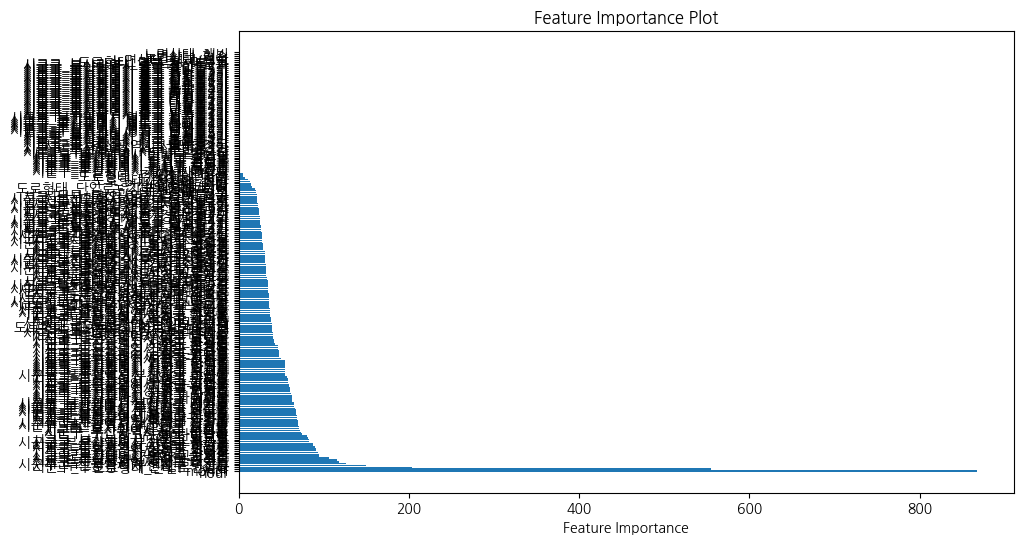

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
# 특성 중요도 얻기
feature_importance = model.feature_importances_

# 특성 중요도를 특성 이름과 매핑
feature_importance_dict = dict(zip(x_train.columns, feature_importance))

# 특성 중요도를 기준으로 정렬
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), [item[1] for item in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [item[0] for item in sorted_feature_importance])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()

In [ ]:
pip install dice-ml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.9 MB/s eta 0:00:00


TypeError: ignored

AttributeError: ignored

#으앙ㅇ아아아

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.4 MB/s eta 0:00:00


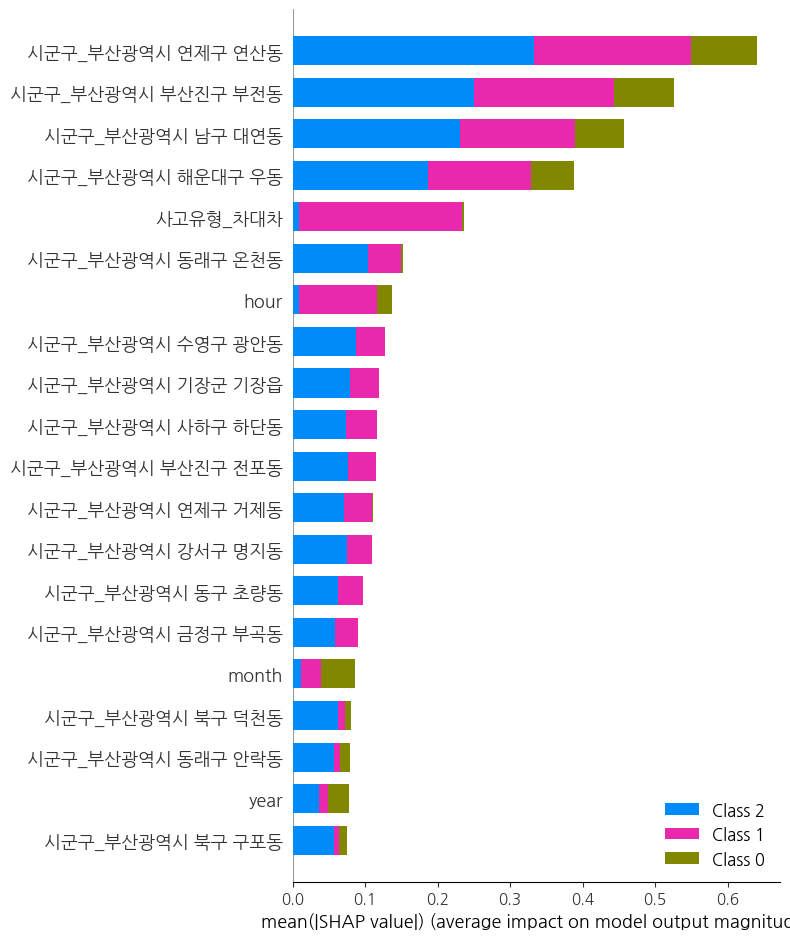

In [ ]:
import shap
import koreanize_matplotlib

# SHAP 설명 객체 생성
explainer = shap.TreeExplainer(model)

# 테스트 데이터에 대한 SHAP 값 계산
shap_values = explainer.shap_values(x_test)

# 각 특성에 대한 SHAP summary plot 생성
shap.summary_plot(shap_values, x_test)


In [ ]:
# 특정 예측에 대한 SHAP force plot 생성
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], x_test.iloc[0, :])


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# RandomForestClassifier 모델 정의
model = RandomForestClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.7389346770599876
macro F1 Score: 0.7373363431129277
Accuracy: 0.7402820777433781
Macro Precision: 0.7488372572077572
              precision    recall  f1-score   support

  Cautionary       0.72      0.78      0.75      1381
   dangerous       0.72      0.62      0.67       783
        safe       0.81      0.78      0.79       743

    accuracy                           0.74      2907
   macro avg       0.75      0.73      0.74      2907
weighted avg       0.74      0.74      0.74      2907



In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 사용하여 문자열 클래스 레이블을 숫자로 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# XGBClassifier 모델 정의
model = XGBClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train_encoded)

# 테스트 데이터 예측
predictions = model.predict(test_x)

In [ ]:
# LabelEncoder를 사용하여 문자열 클래스 레이블을 숫자로 변환
label_encoder = LabelEncoder()
test_y_encoded = label_encoder.fit_transform(test_y)

# F1 스코어 계산
f1_1 = f1_score(test_y_encoded, predictions, average='weighted')
f1_3 = f1_score(test_y_encoded, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_3}')

# 정확도 계산
accuracy = accuracy_score(test_y_encoded, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y_encoded, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y_encoded, predictions))

Weighted F1 Score: 0.7470636297531195
macro F1 Score: 0.7448004727763221
Accuracy: 0.7523219814241486
Macro Precision: 0.7665283345904935
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1381
           1       0.80      0.55      0.65       783
           2       0.78      0.86      0.82       743

    accuracy                           0.75      2907
   macro avg       0.77      0.74      0.74      2907
weighted avg       0.76      0.75      0.75      2907



In [ ]:
train_df

,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,빈도,빈도_scaled,위험지수,year,month,hour,위험지수_group
11,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,중앙선침범,1,0,0,0,10,953,3.033779,30.337795,2019,1,0,dangerous
12,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,1,0,0,5,1132,3.604207,18.021033,2019,1,0,dangerous
30,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5,21,0.063735,0.318674,2019,1,1,safe
48,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,신호위반,0,1,2,0,11,544,1.730402,19.034417,2019,1,2,dangerous
54,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,신호위반,0,0,1,0,3,669,2.128744,6.386233,2019,1,3,Cautionary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,금요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대차,안전운전불이행,0,1,1,0,8,953,3.033779,24.270236,2021,12,22,dangerous
602755,금요일,맑음,부산광역시 금정구 남산동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,0,1,1,4,197,0.624602,2.498407,2021,12,22,safe
602758,금요일,흐림,부산광역시 해운대구 중동,기타 - 기타,건조,차대차,안전운전불이행,0,0,3,0,9,344,1.093053,9.837476,2021,12,22,dangerous
602769,금요일,맑음,부산광역시 연제구 연산동,단일로 - 기타,건조,차대차,안전운전불이행,0,1,0,0,5,1570,5.000000,25.000000,2021,12,23,dangerous


In [ ]:
pip install koreanize-matplotlib

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df[(train_df['year'] >= 2019) & (train_df['year'] <= 2020) | (train_df['year'] == 2021) & (train_df['month'] <= 9)]


In [ ]:
train

,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,빈도,빈도_scaled,위험지수,year,month,hour
11,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,중앙선침범,1,0,0,0,10,953,6.067559,60.675590,2019,1,0
12,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,1,0,0,5,1132,7.208413,36.042065,2019,1,0
30,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5,21,0.127470,0.637349,2019,1,1
48,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,신호위반,0,1,2,0,11,544,3.460803,38.068834,2019,1,2
54,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,신호위반,0,0,1,0,3,669,4.257489,12.772467,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552483,목요일,맑음,부산광역시 사하구 감천동,교차로 - 교차로부근,건조,차대차,중앙선침범,0,0,1,0,3,235,1.491396,4.474187,2021,9,19
552495,목요일,맑음,부산광역시 해운대구 우동,단일로 - 기타,건조,차대사람,보행자보호의무위반,0,0,0,1,1,953,6.067559,6.067559,2021,9,19
552496,목요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로부근,건조,차대차,교차로운행방법위반,0,0,1,0,3,953,6.067559,18.202677,2021,9,19
552537,목요일,맑음,부산광역시 북구 덕천동,단일로 - 기타,건조,차대차,기타,0,0,1,0,3,543,3.454430,10.363289,2021,9,21


In [ ]:
# 그래프의 행과 열 개수
rows, cols = 5, 2

# 그래프 크기 설정
plt.figure(figsize=(14, 26))

# 열 이름 리스트
columns = ['요일', '기상상태', '도로형태', '노면상태', '사고유형', 'year', 'month', 'hour']

# 서브플롯 인덱스 초기화
i = 1

# 각 열에 대해 그래프 그리기
for col in columns:
    plt.subplot(rows, cols, i)
    sns.countplot(x=train[col], hue=train['위험지수'])
    plt.xticks(rotation=45)
    plt.title(f'{col}에 대한 위험지수 개수')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='위험지수', loc='upper right')
    i += 1

plt.tight_layout()
plt.show()


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7d9d077d92d0> (for post_execute):


KeyboardInterrupt: ignored

<ipython-input-69-4919852a3c87>:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


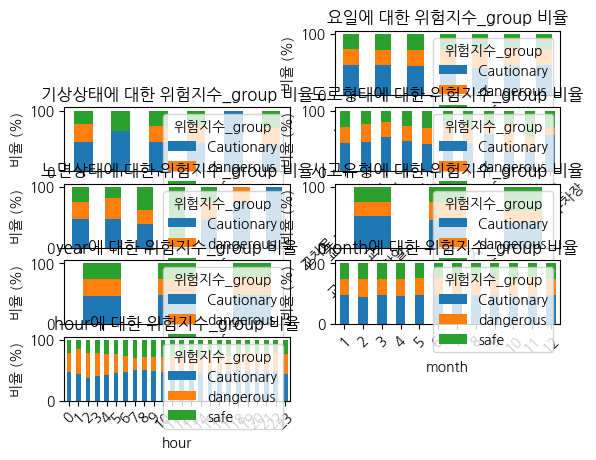

In [ ]:
# 각 열에 대해 그래프 그리기
for col in columns:
    plt.subplot(rows, cols, i)

    # 각 카테고리별로 위험지수_group의 비율 계산
    df = pd.crosstab(train[col], train_df['위험지수_group'], normalize='index')

    # 비율로 표시하기 위해 100을 곱해줌
    df = df * 100

    df.plot(kind='bar', stacked=True, ax=plt.gca())

    plt.xticks(rotation=45)
    plt.title(f'{col}에 대한 위험지수_group 비율')
    plt.xlabel(col)
    plt.ylabel('비율 (%)')
    plt.legend(title='위험지수_group', loc='upper right')
    i += 1

plt.tight_layout()
plt.show()

<ipython-input-70-8ab69db18e5c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['위험지수'],ci=None)
<ipython-input-70-8ab69db18e5c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['위험지수'],ci=None)
<ipython-input-70-8ab69db18e5c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['위험지수'],ci=None)
<ipython-input-70-8ab69db18e5c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['위험지수'],ci=None)
<ipython-input-70-8ab69db18e5c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['위험지수'],ci=None)
<ipython-input-70-8ab69db18e5c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `erro

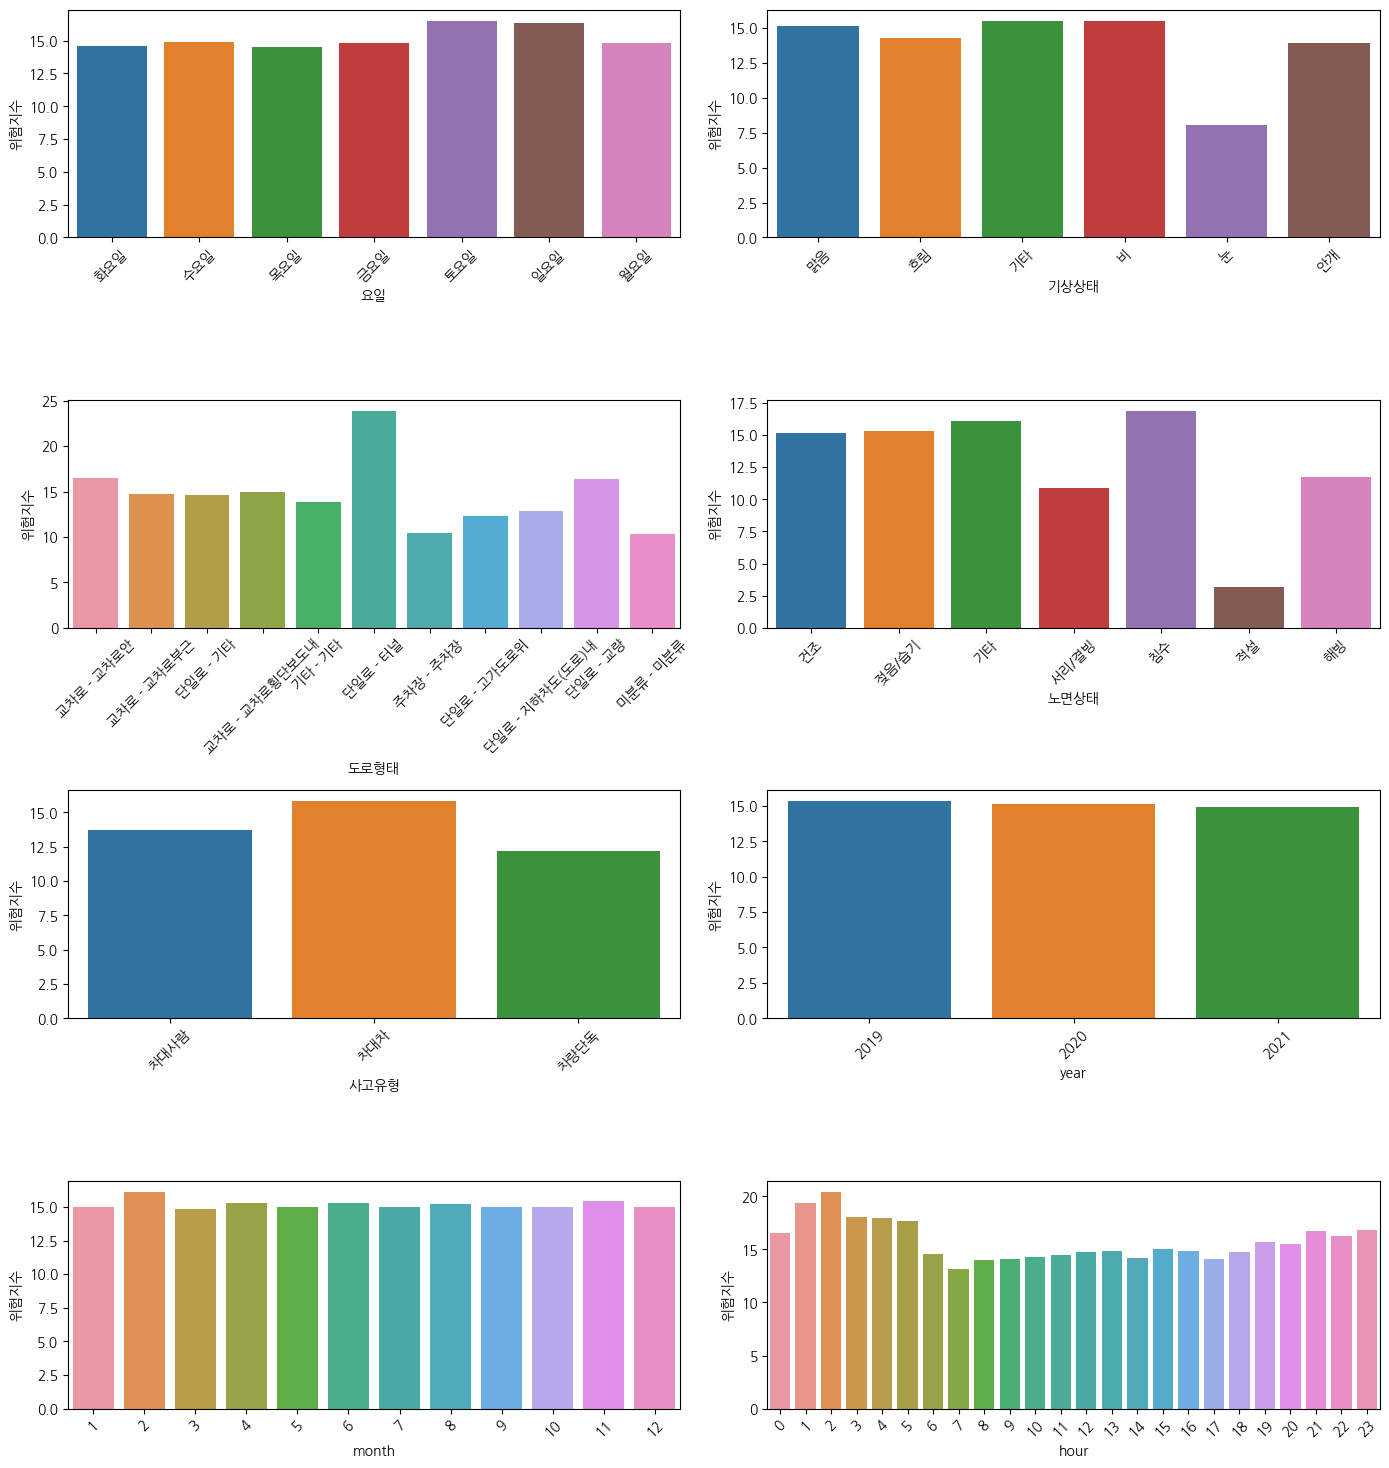

In [ ]:
i = 0
plt.figure(figsize=(14,26))
for col in ['요일', '기상상태', '도로형태', '노면상태', '사고유형', 'year', 'month', 'hour']:
    i += 1
    plt.subplot(7,2,i)
    sns.barplot(x=train[col], y=train['위험지수'],ci=None)
    plt.xticks(rotation=45)
plt.tight_layout()